# Import Data and separate labels and data

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data1=pd.read_csv("train.csv")
l=data1['label']
d=data1.drop("label",axis=1)
labels=l.head(15000)
data=d.head(15000)
print(labels.shape)
print(data.shape)

(15000,)
(15000, 784)


In [31]:
plt.figure(figsize=(7,7))
grid_data=data.iloc[1250].as_matrix().reshape(28,28)
print(labels[1250])

4


# Colum Standardization

In [32]:

from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(data)
print(std_data.shape)


(15000, 784)


# Covariance matrix

In [33]:
co_var=[]
co_var=np.cov(std_data.T)
print(co_var.shape)

(784, 784)


# Calculate Eign values and eign vectors

In [37]:
from scipy.linalg import eigh
values,vectors=eigh(co_var,eigvals=(782,783))
print(values)
vectors=vectors.T
print(vectors.shape)
print(std_data.shape)

[29.03743969 40.38397838]
(2, 784)
(15000, 784)


# PCA:

In [38]:
pca_data=np.matmul(vectors,std_data.T)
print(pca_data.shape)

print(labels.shape)

(2, 15000)
(15000,)


In [39]:
pca_data=np.vstack((pca_data,labels)).T
df=pd.DataFrame(data=pca_data,columns=("1st Principle","2nd Principle","labels"))
df.head()

,1st Principle,2nd Principle,labels
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


# dislay graph

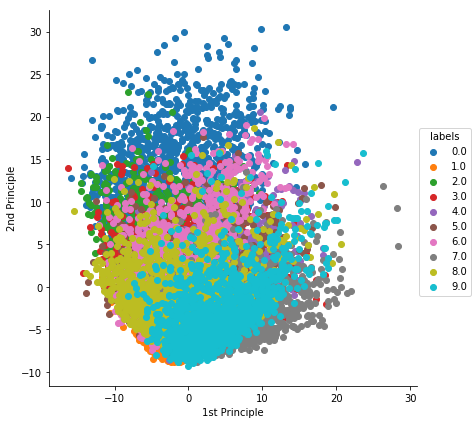

In [40]:
import seaborn as sns
sns.FacetGrid(df,hue="labels", size=6).map(plt.scatter, "1st Principle","2nd Principle").add_legend()
plt.show()